# Outline 

1. Demonstration of Gabor scattering
2. Demonstration of Mel scattering

> Difference between Gabor scattering and Mel scattering is only in the first layer, which is now a dot product of original Layer 1 with mel filter bank with desired parameters. This reduces the dimension of the first layer, making the whole computation faster. It also allows for different parameter settings of resampling, so in the end we can get more important information in a representation with smaller dimensionality, shorter computation time and same (needs to be checked) advantages as Gabor scattering.

3. Side by side comparison

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
cmap = 'inferno' #'magma_r'
from gabor_scattering import gs
from IPython.display import Audio
import scipy.io.wavfile
import numpy as np
import time

In [2]:
testsound = scipy.io.wavfile.read('testsound.wav')[1].astype(np.float64)
sample_params = {'dur': 1.0, 'rate': 44100}
# Audio(testsound, rate=44100)
print('Audio file loaded.')

Audio file loaded.


# Demonstration of Gabor scattering

In [3]:
l1_params = {'nfft': 500, 'nperseg': 500, 'noverlap': 250}
l2_params = {'nfft': 50, 'nperseg': 50, 'noverlap': 40}
mel_params = {'n_mels': 100}
o2_params = {'window_len': 5, 'mode': 'same', 'axis':1}
return_outs = {'return_layer1': True, 'return_layer2': False, 'return_l2avg': False,
               'return_out1': True, 'return_out2': True, 'return_outA': True,
               'return_outB': True, 'return_outC': True}
shapes = {'outA': (200, 150), 'outB': (200, 150), 'outC': (200, 150)}

In [5]:
# Computing the Gabor scattering
st = time.time()
output = gs(testsound, l1_params=l1_params, l2_params=l2_params, 
            mel_params=None, o2_params=o2_params, shapes=shapes, **return_outs)


gs_layer1 = output['layer1']
gs_out1 = output['out1']
gs_out2 = output['out2']
gs_outA = output['outA']
gs_outB = output['outB']
gs_outC = output['outC']
print('Computing the Gabor scattering took {:.4f}s.'.format(time.time() - st))

Computing the Gabor scattering took 0.0150s.


In [6]:
# Layer 1 and OutA
plt.figure(figsize=(15,9)); 
plt.subplot(2,1,1)
plt.imshow(gs_layer1, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - Layer1 of the shape {}'.format(gs_layer1.shape))
plt.subplot(2,1,2)
plt.imshow(gs_outA, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutA of the shape {}, resampled from the original Layer1'.format(gs_outA.shape))
plt.tight_layout()
plt.show()

In [7]:
# Out1 and OutB
plt.figure(figsize=(15,9)); 
plt.subplot(2,1,1)
plt.imshow(gs_out1, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - Out1 of the shape {}'.format(gs_out1.shape))
plt.subplot(2,1,2)
plt.imshow(gs_outB, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutB of the shape {}, resampled from the original Out1'.format(gs_outB.shape))
plt.tight_layout()
plt.show()

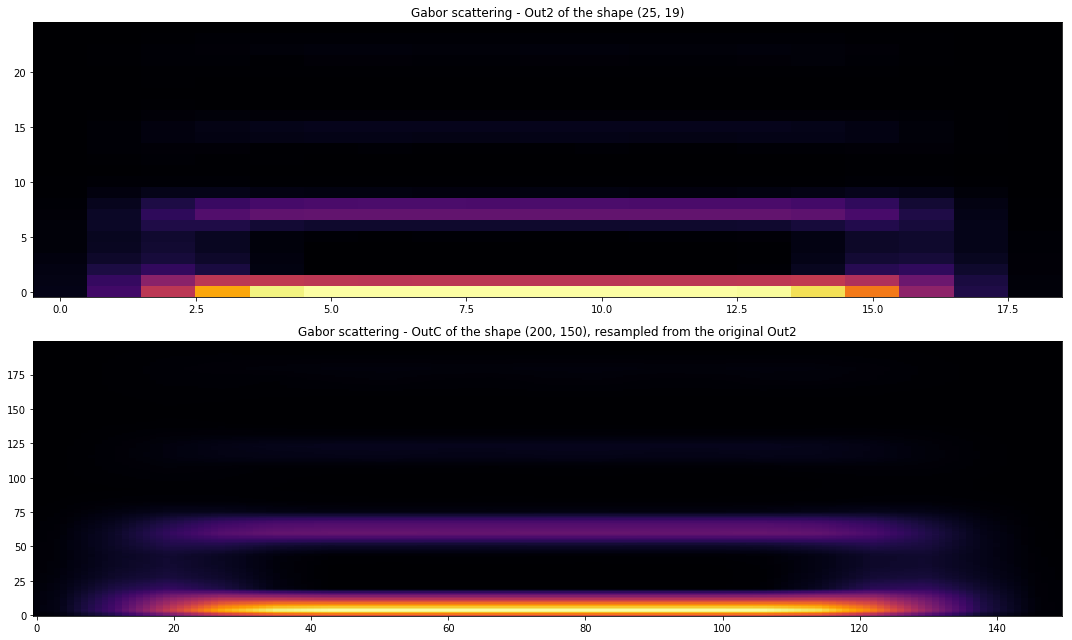

In [8]:
# Out2 and OutC
plt.figure(figsize=(15,9)); 
plt.subplot(2,1,1)
plt.imshow(gs_out2, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - Out2 of the shape {}'.format(gs_out2.shape))
plt.subplot(2,1,2)
plt.imshow(gs_outC, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutC of the shape {}, resampled from the original Out2'.format(gs_outC.shape))
plt.tight_layout()
plt.show()

# Demonstration of Mel scattering

In [9]:
# Computing the Gabor scattering
st = time.time()
output = gs(testsound, l1_params=l1_params, l2_params=l2_params, 
            mel_params=mel_params, o2_params=o2_params, shapes=shapes, **return_outs)


ms_layer1 = output['layer1']
ms_out1 = output['out1']
ms_out2 = output['out2']
ms_outA = output['outA']
ms_outB = output['outB']
ms_outC = output['outC']
print('Computing the Mel scattering took {:.4f}s.'.format(time.time() - st))

Computing the Mel scattering took 0.0253s.


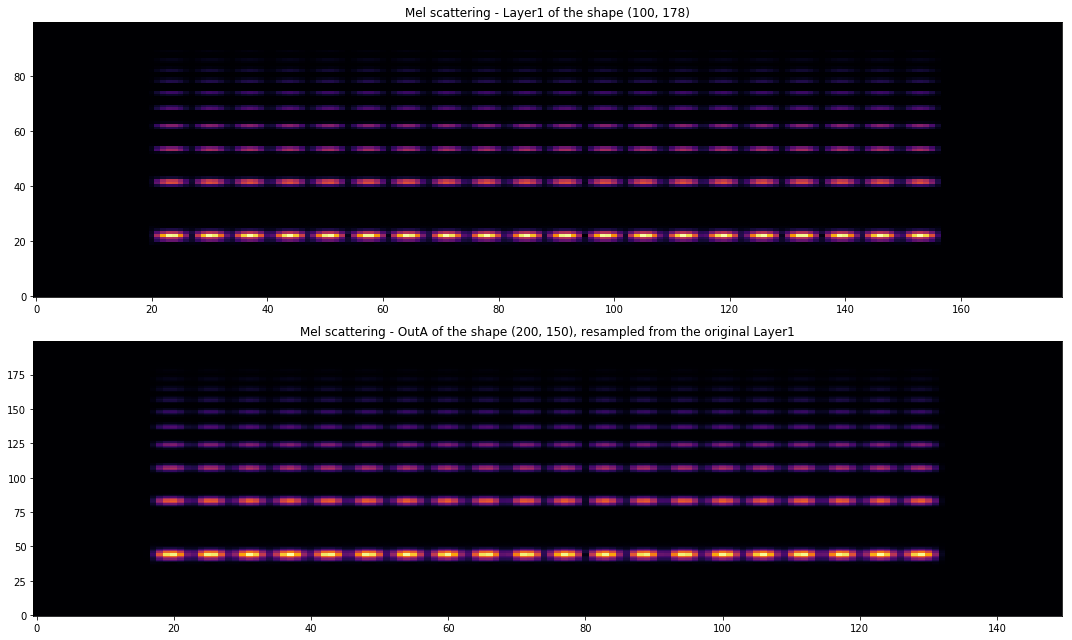

In [10]:
# Layer 1 and OutA
plt.figure(figsize=(15,9)); 
plt.subplot(2,1,1)
plt.imshow(ms_layer1, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - Layer1 of the shape {}'.format(ms_layer1.shape))
plt.subplot(2,1,2)
plt.imshow(ms_outA, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutA of the shape {}, resampled from the original Layer1'.format(ms_outA.shape))
plt.tight_layout()
plt.show()

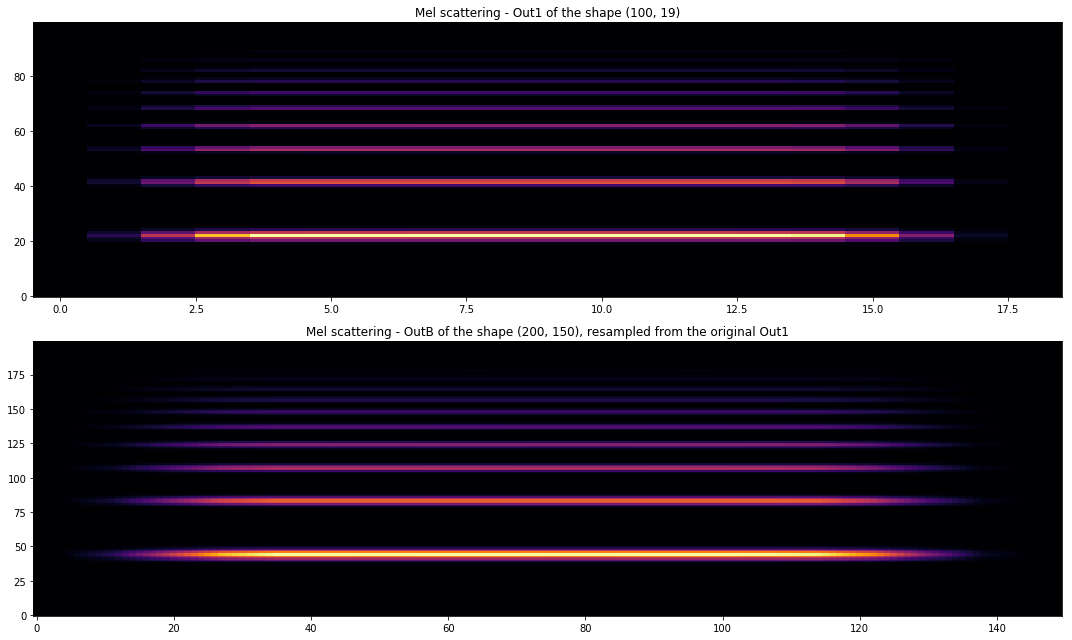

In [11]:
# Out1 and OutB
plt.figure(figsize=(15,9)); 
plt.subplot(2,1,1)
plt.imshow(ms_out1, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - Out1 of the shape {}'.format(ms_out1.shape))
plt.subplot(2,1,2)
plt.imshow(ms_outB, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutB of the shape {}, resampled from the original Out1'.format(ms_outB.shape))
plt.tight_layout()
plt.show()

In [12]:
# Out2 and OutC
plt.figure(figsize=(15,9)); 
plt.subplot(2,1,1)
plt.imshow(ms_out2, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - Out2 of the shape {}'.format(ms_out2.shape))
plt.subplot(2,1,2)
plt.imshow(ms_outC, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutC of the shape {}, resampled from the original Out2'.format(ms_outC.shape))
plt.tight_layout()
plt.show()

# Side by side comparison

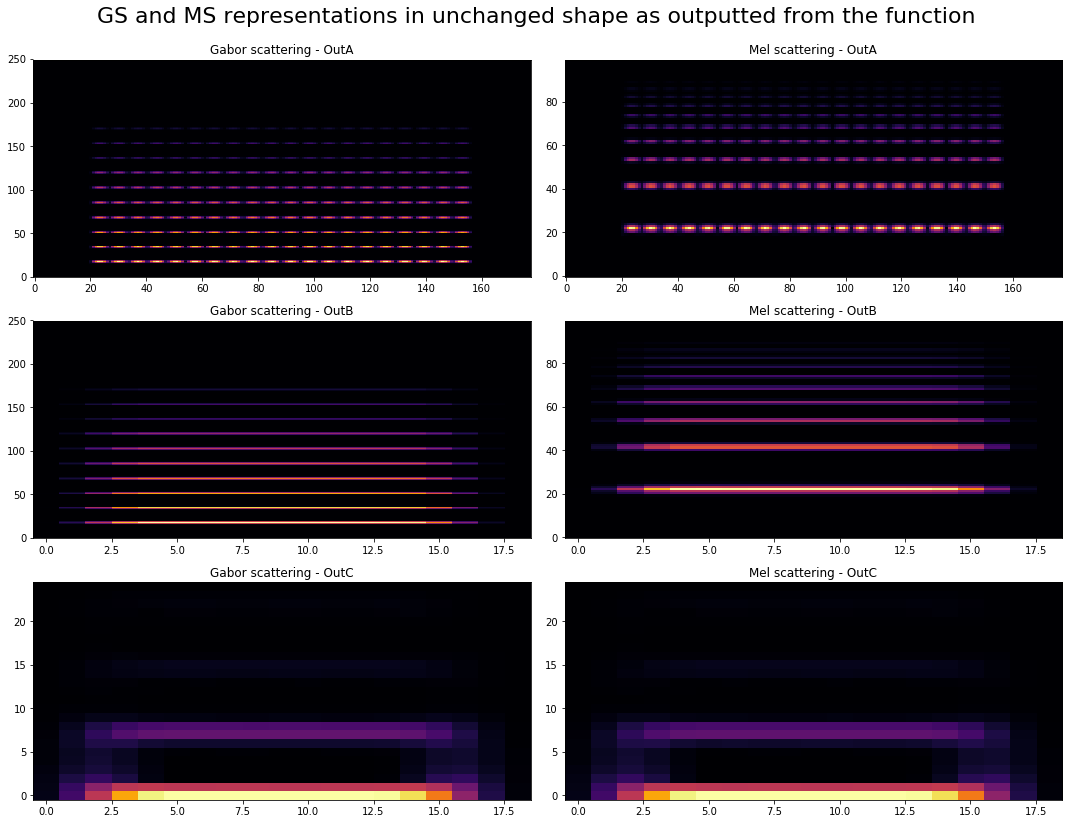

In [13]:
plt.figure(figsize=(15,12)); 

plt.suptitle('GS and MS representations in unchanged shape as outputted from the function', fontsize=22)


plt.subplot(3,2,1)
plt.imshow(gs_layer1, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutA')

plt.subplot(3,2,2)
plt.imshow(ms_layer1, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutA')

plt.subplot(3,2,3)
plt.imshow(gs_out1, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutB')

plt.subplot(3,2,4)
plt.imshow(ms_out1, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutB')

plt.subplot(3,2,5)
plt.imshow(gs_out2, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutC')

plt.subplot(3,2,6)
plt.imshow(ms_out2, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutC')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

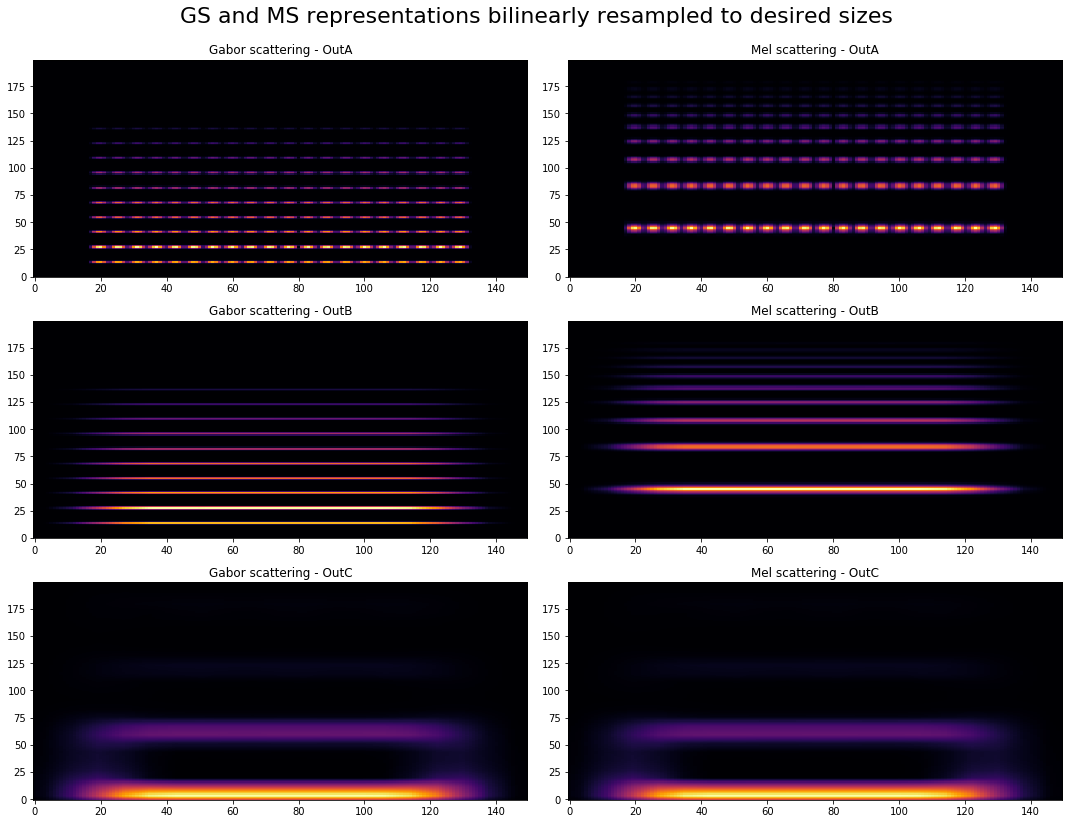

In [14]:
plt.figure(figsize=(15,12)); 
plt.suptitle('GS and MS representations bilinearly resampled to desired sizes', fontsize=22)


plt.subplot(3,2,1)
plt.imshow(gs_outA, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutA')

plt.subplot(3,2,2)
plt.imshow(ms_outA, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutA')

plt.subplot(3,2,3)
plt.imshow(gs_outB, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutB')

plt.subplot(3,2,4)
plt.imshow(ms_outB, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutB')

plt.subplot(3,2,5)
plt.imshow(gs_outC, aspect='auto', origin='lower', cmap=cmap)
plt.title('Gabor scattering - OutC')

plt.subplot(3,2,6)
plt.imshow(ms_outC, aspect='auto', origin='lower', cmap=cmap)
plt.title('Mel scattering - OutC')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()